# Correlação entre média final do aluno e avaliação do professor 

# Import's

In [0]:
#Lib para manuseio dos dados
import pandas as pd
#Lib para salvar os resultados
#import sys
#Lib para plotar os graficos
import matplotlib.pyplot as plt

# Links dos dados abertos

In [0]:
#Avaliacao dos docentes
avaliacao   = 'http://dados.ufrn.br/dataset/d5723d75-7e6e-4264-82aa-b96909b69f63/resource/7accd1d2-2793-460e-b98d-87a0679b9155/download/avaliacaodocencia.csv'
anos = []
#Matriculas nos componentes
anos = {2013.2: 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/517ed5f6-f8a2-40fd-826b-6ed3388f6e88/download/matricula-componente-20132.csv',
        2014.1: 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/7081446d-39f9-4374-ad0b-86ecab97e569/download/matricula-componente-20141.csv',
        2014.2: 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/e974792c-b557-470c-bf3d-ede7d5b5e6a6/download/matricula-componente-20142.csv',
        2015.1: 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/9e7ba1c2-f92d-4b9c-9e91-3b026ecdf913/download/matriculas-de-2015.1.csv',
        2015.2: 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/baa6c8b4-2072-417f-b238-c028ccc8c14b/download/matriculas-de-2015.2.csv',
        2016.1: 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/4778d3ce-8898-46a8-a623-ee6a480a2980/download/matriculas-de-2016.1.csv',
        2016.2: 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/f6179838-b619-4d7d-af9c-18c438b80dd4/download/matriculas-de-2016.2.csv',
        2017.1: 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/79071c21-e32c-438f-b930-d1b6ccc02ec2/download/matricula-componente-20171.csv',
        2017.2: 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/55dfe713-ff7c-4fa8-8d1d-d4294a025bff/download/matricula-componente-20172.csv'}

# Definindo períodos para análise

In [3]:
#Definindo o período de avaliação e filtro de situação dos alunos
ano_ini = 2013
sem_ini = 2
ano_fim = 2017
sem_fim = 2

ano_min = (float) (ano_ini + (sem_ini/10))
ano_max = (float) (ano_fim + (sem_fim/10))
anos_analise = []
for i in range(ano_ini, ano_fim+1):
    for j in range(1, 3):
        valor = (float) (i + (j/10))
        if valor >= ano_min and valor <= ano_max:
            anos_analise.append(valor)
print("Períodos a serem avaliados: ", anos_analise)
possiveis = ["APROVADO POR NOTA", "REPROVADO", "APROVADO"]



Períodos a serem avaliados:  [2013.2, 2014.1, 2014.2, 2015.1, 2015.2, 2016.1, 2016.2, 2017.1, 2017.2]


# Importando avaliações

In [4]:
resultados = []
grafico = {}

#Importando avaliacao com as colunas relevantes
print("Importando avaliação...")
ava_data = pd.read_csv(avaliacao, sep=";").loc[:, ["id_docente", "nome_docente", "ano", "periodo", "id_turma", "qtd_discentes", "autoavaliacao_aluno_media"]]
print("Total de registros na avaliacao: ", len(ava_data.index))
antigo  = str(ava_data['ano'].min()) + "." + str(ava_data[ava_data['ano']==ava_data['ano'].min()]["periodo"].min())
recente = str(ava_data['ano'].max()) + "." + str(ava_data[ava_data['ano']==ava_data['ano'].min()]["periodo"].max())
print("Período mais antigo disponível: ",  antigo)
print("Período mais recente disponível: ", recente)
resultados.append("Total de registros na avaliacao: " + str(len(ava_data.index)))
resultados.append("Período mais antigo disponível: " + antigo)
resultados.append("Período mais recente disponível: " + recente)

Importando avaliação...
Total de registros na avaliacao:  58875
Período mais antigo disponível:  2013.2
Período mais recente disponível:  2017.2


# Executar loop pelos períodos

In [5]:
#Removendo as colunas irrelevantes apartir daqui
ava_data = ava_data.drop(['ano', 'periodo'], axis=1)

#Executando o algoritmo em todos os anos a serem analisados
for i in anos_analise:
	#Reinicializa variaveis
	matricula = ""
	matr_data = []
	media = []
	qtde = []
	soma = []
	final = []

	print("*****************Semestre " + str(i) + "********************")
	resultados.append("*****************Semestre " + str(i) + "********************")
	matricula = anos[i]
	print("Importando turmas " + str(i) + "...")
	matricula_data = pd.read_csv(matricula, sep=";").loc[:, ["id_turma", "discente", "media_final", "descricao"]]
	print("Total de registros em turmas: ", len(matricula_data.index))
	resultados.append("Total de registros em turmas: " + str(len(matricula_data.index)))

	#Filtrando dados validos e removendo duplicidades
	print("Filtrando...")
	matr_data = matricula_data[matricula_data.descricao.isin(possiveis)]
	matr_data.shape
	matr_data = matr_data.drop_duplicates()
	print("Total de registros em matrículas (filtrado): ", len(matr_data.index))
	resultados.append("Total de registros em matrículas (filtrado): " + str(len(matr_data.index)))

	#Agrupando, calculando 
	print("Agrupando, calculando ...")
	media = matr_data.groupby(["id_turma"])["media_final"].sum().to_frame()
	qtde  = matr_data.groupby(["id_turma"])["discente"].count().to_frame()
	soma = pd.merge(media, qtde, on="id_turma", how="inner")
	print("Quantidade de registros na media: ", len(soma.index))
	resultados.append("Quantidade de registros na media: " + str(len(soma.index)))
	media = soma.media_final/soma.discente
	media = media.to_frame()

	#Juntando os dataframes
	final = pd.merge(ava_data, media, on="id_turma", how="inner").sort_values(by=["nome_docente"])

	#Imprimindo o resultado
	print("Quantidade de registros final (merged): ", len(final.index))
	resultados.append("Quantidade de registros final (merged): " + str(len(final.index)))
	final.columns = ["id_docente", "nome_docente", "id_turma", "qtdeDisc", "docente_media", "alunos_media"]
	correlacao = final["docente_media"].corr(final["alunos_media"])
	print("Correlação entre avaliação e média dos alunos: ", correlacao)
	resultados.append("Correlação entre avaliação e média dos alunos: " + str(correlacao))
	grafico[i] = correlacao

	#Salvando cada análise em arquivo
	#final.to_csv("./results/resultado_" + str(i) + " .csv", sep=';', encoding='utf-8', decimal=',')

*****************Semestre 2013.2********************
Importando turmas 2013.2...
Total de registros em turmas:  667167
Filtrando...
Total de registros em matrículas (filtrado):  156000
Agrupando, calculando ...
Quantidade de registros na media:  8618
Quantidade de registros final (merged):  6658
Correlação entre avaliação e média dos alunos:  0.3488848699734119
*****************Semestre 2014.1********************
Importando turmas 2014.1...
Total de registros em turmas:  698421
Filtrando...
Total de registros em matrículas (filtrado):  160626
Agrupando, calculando ...
Quantidade de registros na media:  8805
Quantidade de registros final (merged):  7332
Correlação entre avaliação e média dos alunos:  0.41066460629878576
*****************Semestre 2014.2********************
Importando turmas 2014.2...
Total de registros em turmas:  818762
Filtrando...
Total de registros em matrículas (filtrado):  153162
Agrupando, calculando ...
Quantidade de registros na media:  8839
Quantidade de regist

# Salvar resultado geral em arquivo

In [0]:
#saida = open("./results/geral.txt", "w")
#for linha in resultados:
#    saida.write(linha + "\n")
#saida.close()

# Gerar gráfico das correlações

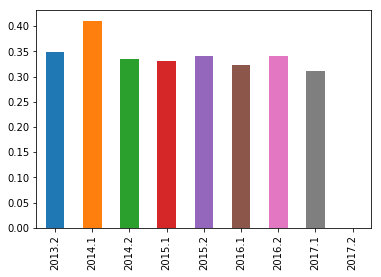

In [7]:
s = pd.Series(grafico)
s.plot.bar()
plt.show()